In [1]:
"""
IMPORTS
"""
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import folium 
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
from vega_datasets import data as vds
from branca.element import Figure
import re
from datetime import datetime


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

from sklearn import metrics

### 1.- Obtención de los datos

In [3]:
df_modelado= pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_corregido_prueba.csv',sep=',')
df_modelado

,Código Tipo Supuesto Urgente,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Tipo Supuesto Urgente,Fecha Cita,Age_range_code,Nationality_code,Sex_code,year,Quarteryear
0,30.0,CSS Zaida,11,CARABANCHEL,19-29,Extranjera,M,2,Zona / Historia Social,Alojamiento/Vivienda,2021-01-04,0,2,1,2021,1
1,30.0,CSS Zaida,11,CARABANCHEL,30-39,Española,M,1,Primera Atención,Alojamiento/Vivienda,2021-01-04,1,1,1,2021,1
2,40.0,CSS Santa Hortensia,5,CHAMARTÍN,>=65,Española,M,1,Primera Atención,Desproteccion social problema salud,2021-01-04,6,1,1,2021,1
3,30.0,CSS Luis Vives,15,CIUDAD LINEAL,19-29,Extranjera,H,2,Zona / Historia Social,Alojamiento/Vivienda,2021-01-04,0,2,0,2021,1
4,40.0,CSS Gallur,10,LATINA,>=65,Española,M,1,Primera Atención,Desproteccion social problema salud,2021-01-04,6,1,1,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,30.0,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30-39,Española,M,2,Zona / Historia Social,Alojamiento/Vivienda,2018-12-28,1,1,1,2018,4
37902,40.0,CSS Loyola de Palacio,12,USERA,>=65,Española,M,2,Zona / Historia Social,Desproteccion social problema salud,2018-12-28,6,1,1,2018,4
37903,30.0,CSS San Filiberto,12,USERA,30-39,Extranjera,M,2,Zona / Historia Social,Alojamiento/Vivienda,2018-12-28,1,2,1,2018,4
37904,30.0,CSS San Filiberto,12,USERA,>=65,Española,H,1,Primera Atención,Alojamiento/Vivienda,2018-12-28,6,1,0,2018,4


### 2.- Preparing TRAIN AND TEST DataFrames

In [4]:
X=df_modelado[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y=df_modelado['Código Tipo Supuesto Urgente']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)       # Genero los datos para entrenamiento y testeo
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(28429, 5)
(9477, 5)
(28429,)
(9477,)


In [50]:
train=pd.concat([X_train,y_train],axis=1)
train


,Código Distrito Centro,Age_range_code,Nationality_code,Sex_code,year,Código Tipo Supuesto Urgente
10915,7,1,2,1,2020,50.0
25000,6,1,2,1,2020,50.0
21303,13,0,2,1,2020,30.0
26143,1,6,2,0,2020,40.0
10458,6,1,2,0,2020,50.0
...,...,...,...,...,...,...
20757,6,2,2,1,2020,50.0
32103,11,1,2,1,2019,30.0
30403,7,2,2,1,2019,30.0
21243,8,2,1,1,2020,50.0


In [51]:
test=pd.concat([X_test,y_test],axis=1)
test

,Código Distrito Centro,Age_range_code,Nationality_code,Sex_code,year,Código Tipo Supuesto Urgente
27744,1,0,1,1,2019,50.0
35549,11,6,1,0,2018,40.0
32052,18,0,1,0,2019,30.0
17684,6,1,2,1,2020,50.0
12673,8,0,1,1,2020,50.0
...,...,...,...,...,...,...
4758,6,2,2,1,2020,50.0
7761,6,2,2,1,2020,50.0
24784,6,3,2,1,2020,50.0
20438,6,3,2,1,2020,50.0


In [52]:
train.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',header=True,index=False)
test.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',header=True,index=False)

### 3.- My first Model (DecisionTreeClassifier)

In [3]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',sep=',')


In [4]:
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [5]:
y_pred

NameError: name 'y_pred' is not defined

Accuracy 0.7684921388625092


<AxesSubplot:>

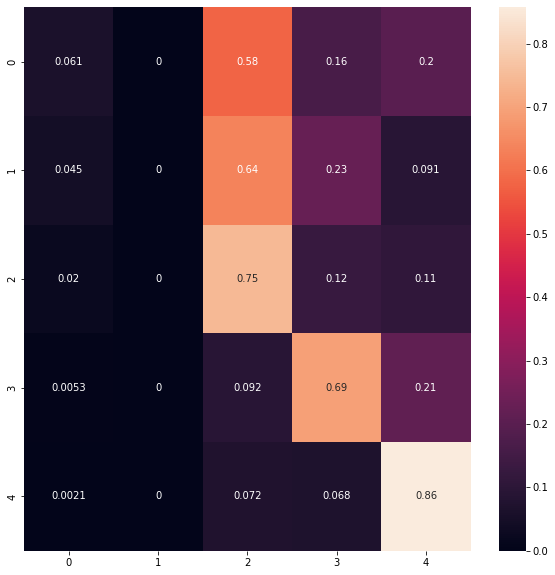

In [ ]:
tree_reg = DecisionTreeClassifier(random_state=20)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)
                 
#print('Precision', precision_score(y_test, y_pred))
#print('Recall', recall_score(y_test, y_pred))
#print('ROC', roc_auc_score(y_test, y_pred))



Accuracy 0.7710245858394007


<AxesSubplot:>

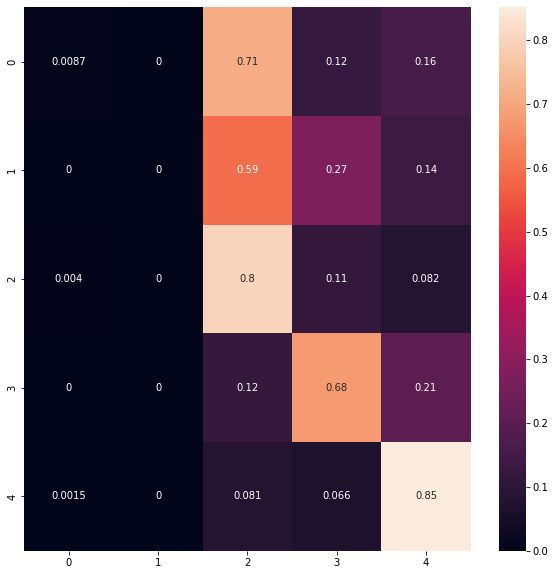

In [6]:
tree_reg = DecisionTreeClassifier(random_state=20,max_depth=7)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)
                 
#print('Precision', precision_score(y_test, y_pred))
#print('Recall', recall_score(y_test, y_pred))
#print('ROC', roc_auc_score(y_test, y_pred))

In [7]:
import pickle 

In [ ]:
date=str(datetime.today().strftime('%y%m%d%H%M%S'))
name=input("Introduce el nombre del modelo a grabar (iniciales): ")
path=str('Javier/Repositorios/Machine_Learning/model/')
file=path+name+date+'.pickle'
pickle.dump(tree_reg,open(file,'wb'))

In [ ]:
var.gbct.fit


In [22]:
modelo=str(gbct.fit)

NameError: name 'gbct' is not defined

In [20]:
print(type(modelo))

<class 'str'>


In [15]:
modelo

'DecisionTreeClassifier(max_depth=7, random_state=20)'

In [17]:
modelo_prueba=str(modelo.split('_').str.get(0))
print(modelo_prueba)

AttributeError: 'list' object has no attribute 'str'

In [21]:

#pickle_file= file('train.pickle','w')
pickle.dump(tree_reg,open('train.pickle','wb'))

In [23]:
favorite_color = pickle.load( open( "train.pickle", "rb" ) )

In [24]:
favorite_color      #Vemos que se ha cargado el fichero

DecisionTreeClassifier(random_state=20)

In [56]:
from datetime import datetime

date=str(datetime.today().strftime('%y%m%d%H%M%S'))
model=str('TDC')
path=str('Javier/Repositorios/Machine_Learning/model')
file=path+model+date+'.pickle'
print(file)

Javier/Repositorios/Machine_Learning/modelTDC220831165608.pickle


### 4.- Exploring Graphics

### 5.- My first Model (linearRegression)

In [ ]:
df_urgencias_corregido['Código Tipo Supuesto Urgente']=df_urgencias_corregido['Código Tipo Supuesto Urgente'].mask(df_urgencias_corregido['Código Tipo Supuesto Urgente'] == ' ').fillna(0)
#   He añadido este codigo para ver si conseguia hacer que funcionará el modelo, al haber NaN en y

In [ ]:
X=df_urgencias_corregido_prueba[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y=df_urgencias_corregido_prueba['Código Tipo Supuesto Urgente']

In [ ]:

lin_reg = LinearRegression()   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lin_reg.fit(X_train, y_train)                           #   Entrenas/generas el modelo para determinar los coeficientes

print("Estos son los datos del test y del target:\n-----")
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)  

#    print("Estos son los datos del valor de y en x=0 y de las pendientes de cada gradiente de las variables:\n-----")
#    print(lin_reg.intercept_)
#    print(lin_reg.coef_)
coeff_df = pd.DataFrame(lin_reg.coef_,
                            X.columns,
                            columns=['Coefficient'])
print("-----\nEstos son las pendientes de cada gradiente visto en un Dataframe:")
print(coeff_df)

predictions = lin_reg.predict(X_test)                   #   Determino los resultados que deberían de dar con los valores guardados para
print("-----\nEl factor de correlacion de la regresión es: ",lin_reg.score(X_test, y_test))
print("-----\nErrores de las predicciones:")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("-----\nErrores de los tests:")
print('MAE:', metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, lin_reg.predict(X_train)))
print('MSE:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))

print("Esta es la importancia de las variables:\n-----")
features = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['coefficient'])
print(features.head().sort_values('coefficient', ascending=False))

Se observa en los datos que, efectivamente, un **módelo de regresión lineal** no es válido para este tipo de predicciones, ya que el coeficiente de correlación de la regresión es 0.268.